
Refer the “Engine.csv” and observe the dataset and decide type of Regression.
Datasets provide fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada.
Predict the Co2emission for with given fuel consumption ratings CYLINDERS, ENGINESIZE, FUELCONSUMPTION_COMB.
Performing the following Tasks:
1] load the data from csv file
2] perform exploratory data analysis (EDA)
- Explore the data
- Understand the data types
- Understand the relationships
- Clean the data

3] Create and train the model (Linear Regression)
4] predict the data
5] Visualize the data using seaborn library
5] check the models performance using different performance metrics like mean absolute error, mean squared error, root mean squared error, R squared.
5] observe the correlation of independent variables with dependent variables, change the independent variables whose strength is less with respect to dependent variables and check the model performance again.
Hint: This question is based on Multiple Linear Regression.
5] predict the Co2emission where the ENGINESIZE is 2.0, CYLINDERS is 4, UELCONSUMPTION_COMB is 8.

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
df = pd.read_csv('./Engine.csv')
df.head(5)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ENGINESIZE            1067 non-null   float64
 1   CYLINDERS             1067 non-null   int64  
 2   FUELCONSUMPTION_COMB  1067 non-null   float64
 3   CO2EMISSIONS          1067 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 33.5 KB


In [94]:
df.describe()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
count,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.346298,5.794752,11.580881,256.228679
std,1.415895,1.797447,3.485595,63.372304
min,1.000000,3.000000,4.700000,108.000000
25%,2.000000,4.000000,9.000000,207.000000
50%,3.400000,6.000000,10.900000,251.000000
75%,4.300000,8.000000,13.350000,294.000000
max,8.400000,12.000000,25.800000,488.000000


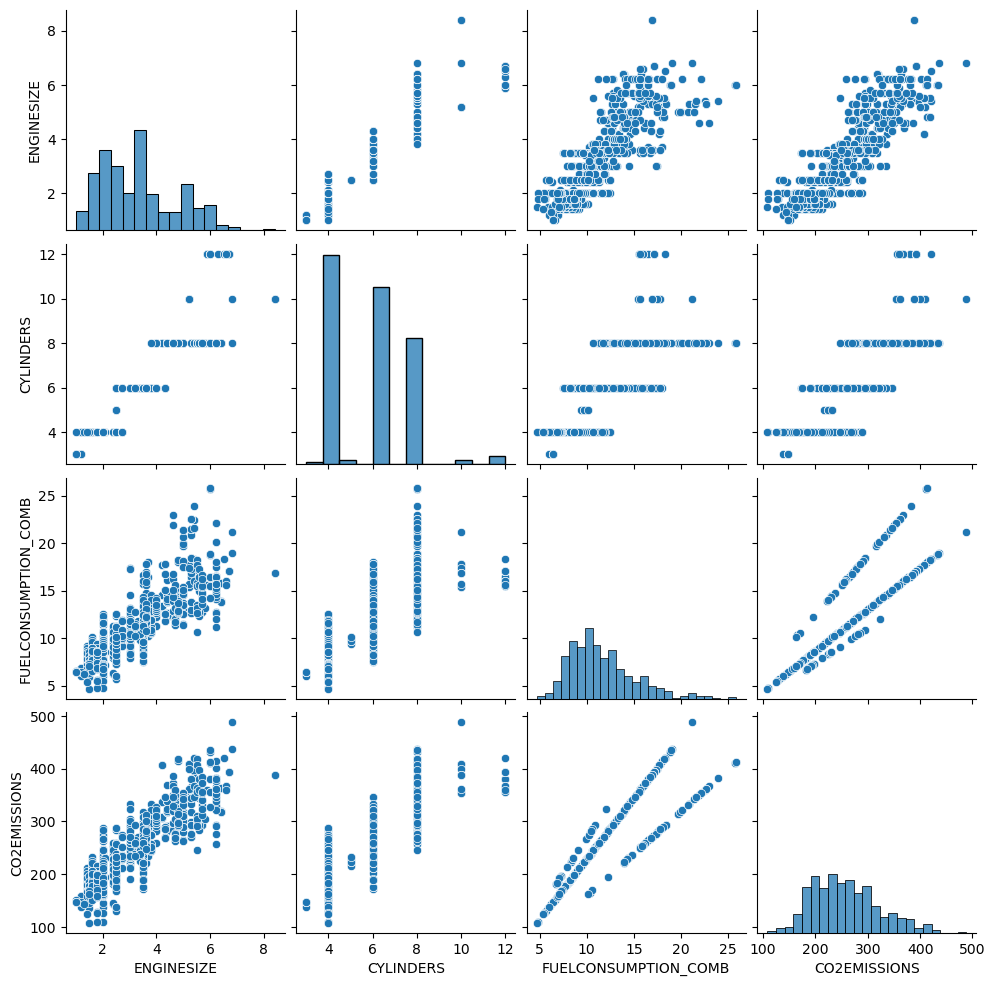

In [95]:
sns.pairplot(df)

In [96]:
df.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.819482,0.874154
CYLINDERS,0.934011,1.000000,0.776788,0.849685
FUELCONSUMPTION_COMB,0.819482,0.776788,1.000000,0.892129
CO2EMISSIONS,0.874154,0.849685,0.892129,1.000000


In [97]:
x = df.drop(['CO2EMISSIONS'], axis = 1)
y = df['CO2EMISSIONS']

In [112]:
df.columns

Index(['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS',
       'pc'],
      dtype='object')

In [115]:
df.drop(['CO2EMISSIONS'], axis = 1)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,pc
0,2.0,4,8.5,-60.347809
1,2.4,4,9.6,-35.328154
2,1.5,4,5.9,-120.384048
3,3.5,6,11.1,-1.242245
4,3.5,6,10.6,-12.248244
...,...,...,...,...
1062,3.0,6,11.8,14.755392
1063,3.2,6,11.5,7.756367
1064,3.0,6,11.8,14.755392
1065,3.2,6,11.3,3.753294


In [116]:
from sklearn.decomposition import PCA

# create an object of PCA
pca = PCA(n_components=1)

# fit the data
pca.fit(df)

# transform the data
reduced_x = pca.transform(df)


In [117]:
from sklearn.linear_model import LinearRegression

# create a model
model = LinearRegression()

# train the model using reduced independent variables
model.fit(reduced_x, y)

LinearRegression()

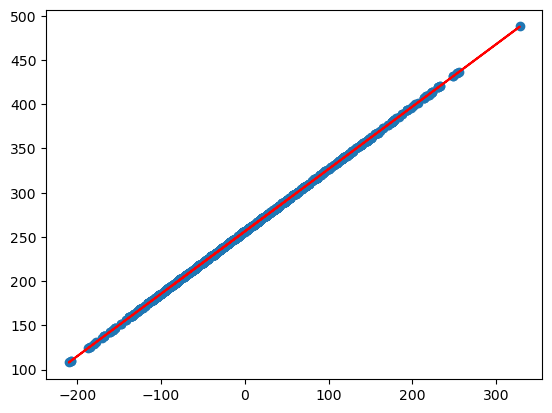

In [109]:
plt.scatter(reduced_X, df['CO2EMISSIONS'])

Y_predict = model.predict(reduced_X)
plt.plot(reduced_X, Y_predict, color="red")

In [119]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 12345)

In [120]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [121]:
y_true = y_test
y_pred = model.predict(x_test)

In [122]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

In [123]:
print(f"mean absolute error: {mae:.2f}")
print(f"mean squared error: {mse:.2f}")
print(f"root mean squarred error: {rmse:.2f}")
print(f"r2 score = {r2:.2f}")

mean absolute error: 16.30
mean squared error: 496.30
root mean squarred error: 22.28
r2 score = 0.88


In [124]:
ENGINESIZE = 2.0
CYLINDERS = 4
UELCONSUMPTION_COMB = 8.
CO2EMISSIONS = model.predict([[ENGINESIZE, CYLINDERS, UELCONSUMPTION_COMB]])
CO2EMISSIONS

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([194.16114535])